<a href="https://colab.research.google.com/github/Nigar21/NN_templates/blob/main/Binary_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
print(tf.__version__)

2.8.0


In [2]:
from sklearn.datasets import make_circles

samples = 1000
X, y = make_circles(samples,
                    noise = 0.03,
                    random_state = 42)

In [3]:
print(X), print(y)

[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 ...
 [-0.13690036 -0.81001183]
 [ 0.67036156 -0.76750154]
 [ 0.28105665  0.96382443]]
[1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 0 0 1 0 0 0 1
 1 1 0 0 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 1 0 0 1 0 0 1 0 1 1 1 1 0 1 0 0 1 1
 0 0 1 0 1 0 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 0 1 1 0 1 0 1 1 1 1 0 1 1
 1 1 1 0 0 0 1 1 0 1 0 1 0 0 1 1 0 1 1 1 1 0 1 1 0 0 0 0 0 0 0 1 0 1 1 1 0
 1 0 1 0 1 0 1 0 0 1 0 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 1
 0 0 0 1 1 1 1 1 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 0 1 0 0 1 1 1 0 1 0 1 1 0 1
 1 0 1 0 1 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1
 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 1 0 0 1 0 1 1 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0
 1 0 0 0 1 0 0 0 1 1 0 1 1 1 1 1 1 1 0 0 0 0 1 0 0 0 0 1 1 1 0 0 1 0 1 0 1
 1 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1
 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 1 1 0 1 1 0 0 1 0 1 0 0 0 1 1 0 0 1 1 1 1 1
 0 0 1 

(None, None)

In [4]:
circle = pd.DataFrame({ 'X0' : X[:, 0], 'X1' : X[:, 1], 'label' : y})
circle.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


In [5]:
circle.label.value_counts()

1    500
0    500
Name: label, dtype: int64

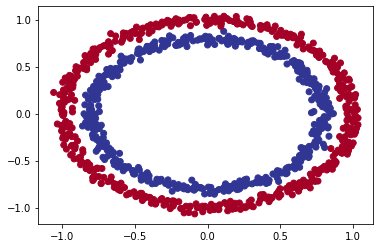

In [6]:
plt.scatter(X[:,0], X[:,1], c = y, cmap = plt.cm.RdYlBu)

In [7]:
print(X.shape, y.shape)
print(len(X), len(y))

(1000, 2) (1000,)
1000 1000


In [8]:
X[0], y[0]


(array([0.75424625, 0.23148074]), 1)

In [9]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([tf.keras.layers.Dense(1)])

model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(), 
                metrics = ['accuracy'])

model_1.fit(X, y, epochs = 5)

Epoch 1/5
32/32 [==============================] - 1s 2ms/step - loss: 2.8544 - accuracy: 0.4600
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7131 - accuracy: 0.5430
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6973 - accuracy: 0.5090
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6950 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.4830


In [10]:
model_1.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5090


[0.6934750080108643, 0.5090000033378601]

In [11]:
model_1.fit(X, y, epochs = 200, verbose = 0)

In [12]:
model_1.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

In [13]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([ tf.keras.layers.Dense(1),

                               tf.keras.layers.Dense(1)
])

model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),

                metrics = ['accuracy'])

model_2.fit(X, y, epochs = 100, verbose = 0)


In [14]:
model_2.evaluate(X,y)

32/32 [==============================] - 0s 3ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6933314800262451, 0.5]

In [15]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([

  tf.keras.layers.Dense(100), # add 100 dense neurons

  tf.keras.layers.Dense(10), # add another layer with 10 neurons

  tf.keras.layers.Dense(1)

])

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),

                optimizer=tf.keras.optimizers.Adam(), 

                metrics=['accuracy'])

model_3.fit(X, y, epochs=100, verbose=0)

In [16]:
model_3.evaluate(X, y)

32/32 [==============================] - 0s 4ms/step - loss: 0.6980 - accuracy: 0.5080


[0.6980255246162415, 0.5080000162124634]

doing binary classifcation...


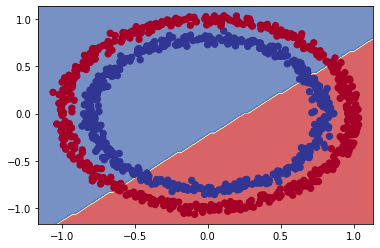

In [45]:
def plot_decision_boundary(model, X, y):
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] 
  # Make predictions using the trained model
  y_pred = model.predict(x_in)
  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
      print("doing binary classifcation...")
      y_pred = np.round(y_pred).reshape(xx.shape)
  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

plot_decision_boundary(model_3, X, y)

tf.Tensor(
[-12. -11. -10.  -9.  -8.  -7.  -6.  -5.  -4.  -3.  -2.  -1.   0.   1.
   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.], shape=(24,), dtype=float32)


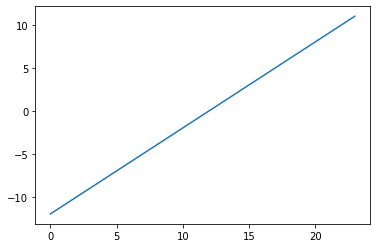

In [46]:
A = tf.cast(tf.range(-12,12), tf.float32)
print(A)
plt.plot(A)

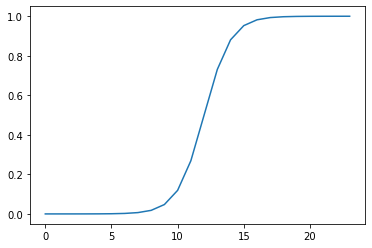

In [47]:
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))
sigmoid(A)
plt.plot(sigmoid(A))

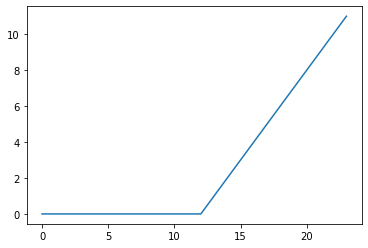

In [48]:
def relu(x):
  return tf.maximum(0,x)
plt.plot(relu(A))

In [49]:
#train-test split
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]
X_train.shape, X_test.shape

((800, 2), (200, 2))

In [50]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([

                               tf.keras.layers.Dense(4, activation = 'relu'), #we may right it "tf.keras.activations.relu" too

                               tf.keras.layers.Dense(4, activation = 'relu'),

                               tf.keras.layers.Dense(1, activation = 'sigmoid')

])

model_4.compile( loss= tf.keras.losses.binary_crossentropy,

                optimizer = tf.keras.optimizers.Adam(lr = 0.01),

                metrics = ['accuracy'])

model_4.fit(X_train, y_train, epochs = 25, verbose = 0)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [51]:
loss, accuracy = model_4.evaluate(X_test, y_test)
print(f' Model loss on the test set: {loss}')
print(f' Model accuracy on the test set: {100*accuracy}')

7/7 [==============================] - 0s 2ms/step - loss: 0.1247 - accuracy: 1.0000
 Model loss on the test set: 0.12468849867582321
 Model accuracy on the test set: 100.0


doing binary classifcation...
doing binary classifcation...


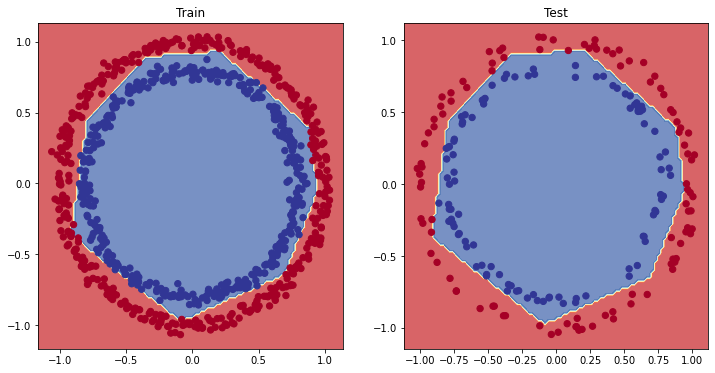

In [52]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_4, X=X_test, y=y_test)
plt.show()